In [2]:
import librosa
import librosa.display
import IPython.display as ipd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
# load audio file
# from_video_path = "../audios/LO3.mp3"
from_video_path = "../../snare_piano.mp3"

ipd.Audio(from_video_path)

(12, 237)

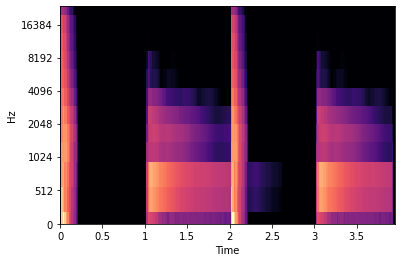

In [6]:
# sr = sample rate is the number of sample in one second
y, sr = librosa.load(from_video_path, sr=48000)

S = librosa.feature.melspectrogram(y, sr=sr, n_mels=12, win_length=1024, hop_length=800)
log_S = librosa.power_to_db(S, ref=np.max)
librosa.display.specshow(log_S,  sr=sr, y_axis = 'mel', x_axis='time',  hop_length=800)

S.shape

(128, 237)
3.9444999999999997
189336


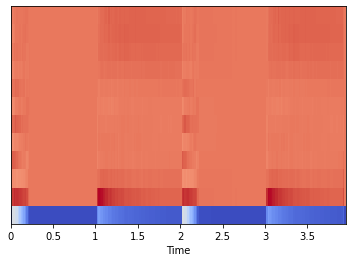

In [5]:
# Let's make and display a mel-scaled power (energy-squared) spectrogram
S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128, win_length=1024, hop_length=800)

# Convert to log scale (dB). We'll use the peak power (max) as reference.
log_S = librosa.power_to_db(S, ref=np.max)
mfcc = librosa.feature.mfcc(S=log_S, n_mfcc=12)

librosa.display.specshow(mfcc,  sr=sr, x_axis='time',  hop_length=800)

print(S.shape)
print(1/sr * y.size)
print(y.size)

[  2  62 121 182 236]


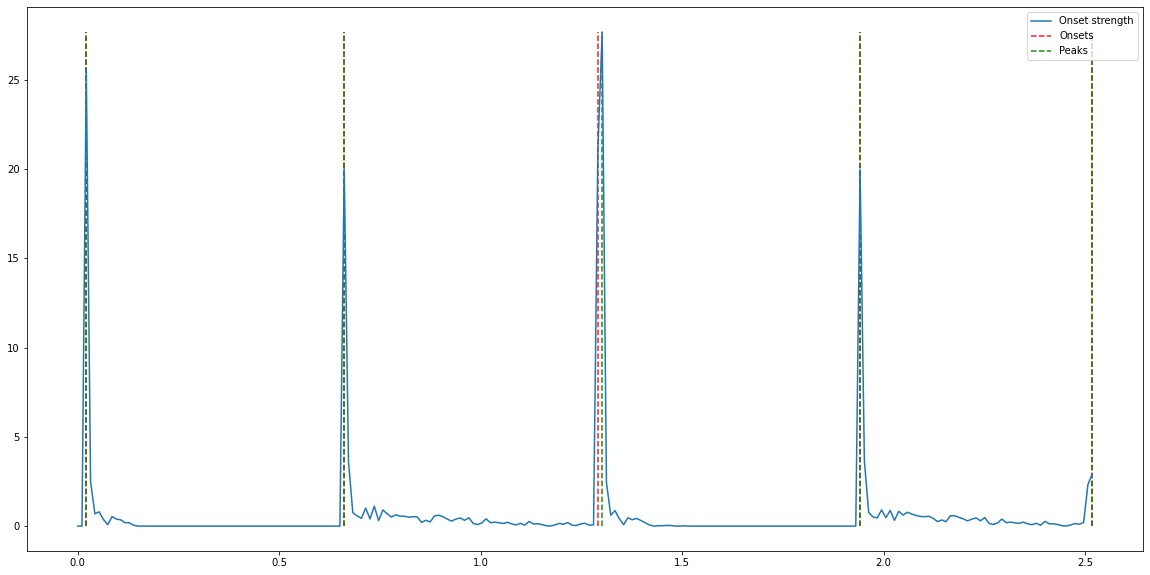

In [35]:
import matplotlib.pyplot as plt

o_env = librosa.onset.onset_strength(y, sr=sr, hop_length=800)
times = librosa.times_like(o_env, sr=sr)
onset_frames = librosa.onset.onset_detect(onset_envelope=o_env, sr=sr)

print(onset_frames)

peaks = librosa.util.peak_pick(o_env, 3, 3, 3, 5, 0.5, 10)

D = np.abs(librosa.stft(y))

plt.figure(figsize=(20, 10))

plt.plot(times, o_env, label='Onset strength')
plt.vlines(times[onset_frames], 0, o_env.max(), color='r', alpha=0.9,
           linestyle='--', label='Onsets')
plt.vlines(times[peaks], 0, o_env.max(), color='g', alpha=0.9,
           linestyle='--', label='Peaks')
plt.legend()



## Decompose and re-compose MFCC 

In [ ]:
import librosa
import numpy as np
import soundfile as sf

y, sr = librosa.load(librosa.ex('brahms'))
mfccs = librosa.feature.mfcc(y, sr, n_mfcc=40)
sf.write('./mel/trumpet_original.wav', y, sr)
sf.write('./mel/trumpet_full.wav', librosa.feature.inverse.mfcc_to_audio(mfccs), sr)
for i in range(mfccs.shape[0]):
    mfcc_slice = np.zeros_like(mfccs)
    mfcc_slice[i, :] = mfccs[i, :]
    sf.write(f'./mel/trumpet_{i}.wav', librosa.feature.inverse.mfcc_to_audio(mfcc_slice), sr)